In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
# Generate a random dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=['Transaction Amount', 'Time Since Last Transaction'])
df['Fraudulent'] = y


In [4]:
df.head()

,Transaction Amount,Time Since Last Transaction,Fraudulent
0,1.132004,0.871043,1
1,-2.881384,1.865535,0
2,2.410690,1.686012,1
3,1.559419,1.668911,1
4,1.928973,1.542549,1


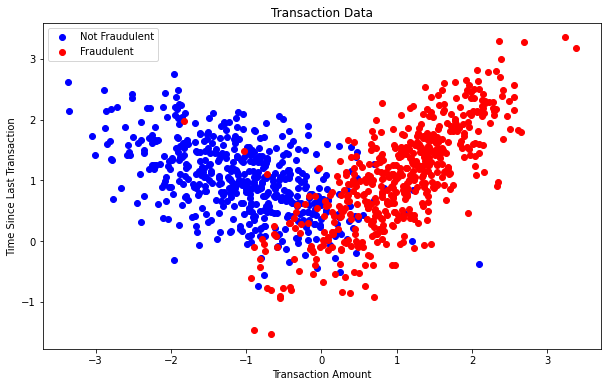

In [5]:
# Plotting the dataset
plt.figure(figsize=(10,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Not Fraudulent')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Fraudulent')
plt.legend()
plt.xlabel('Transaction Amount')
plt.ylabel('Time Since Last Transaction')
plt.title('Transaction Data')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.925
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        95
           1       0.94      0.91      0.93       105

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[89  6]
 [ 9 96]]


In [9]:
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Precision: 0.9411764705882353
Recall: 0.9142857142857143
F1-Score: 0.9275362318840579


In [11]:
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9779448621553886
